# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/tanuprabhu/linear-regression-dataset

**Task:**

Linear Regression


**Datasets**

Context
The reason behind providing the data-set is that currently I'm doing my Master's in Computer Science, in my second semester I have chosen Data Science class, so in this class they are teaching me Linear Regression, so I decided to provide a set of x and y values, which not only helps me and also helps others.

Content
The dataset contains x and y values:
x values are just iterating values.
x values: Iterating Values Starting from 1 and ending at 300

y values depend on the equation y = mx+c.


Inspiration
Everyone on this planet should be familiar (at least Computer Science students, etc.) about Linear Regression, so calculate the trend line, R^2, coefficient and intercept values.



In [22]:
train dataset 

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [23]:
Test dataset

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


**Features(x):**

x values are just iterating values.


**Target(y):**

y values depend on the equation y = mx+c.

---

## Build Your Model

### Data preprocessing

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 데이터 불러오기
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# 데이터 프레임 확인
print("Training data head:")
print(train_data.head())
print("\nTraining data info:")
print(train_data.info())
print("\nTraining data description:")
print(train_data.describe())

print("\nTesting data head:")
print(test_data.head())
print("\nTesting data info:")
print(test_data.info())
print("\nTesting data description:")
print(test_data.describe())

Training data head:
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None

Training data description:
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618

Testing data head:
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864

Testing data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 colu

In [13]:
train_data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [14]:
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [15]:

# 결측치 확인
print("Before preprocessing:")
print("Training data with null values:")
print(train_data.isnull().sum())
print("Test data with null values:")
print(test_data.isnull().sum())

# 결측치 제거
train_data = train_data.dropna()
test_data = test_data.dropna()

Before preprocessing:
Training data with null values:
x    0
y    1
dtype: int64
Test data with null values:
x    0
y    0
dtype: int64


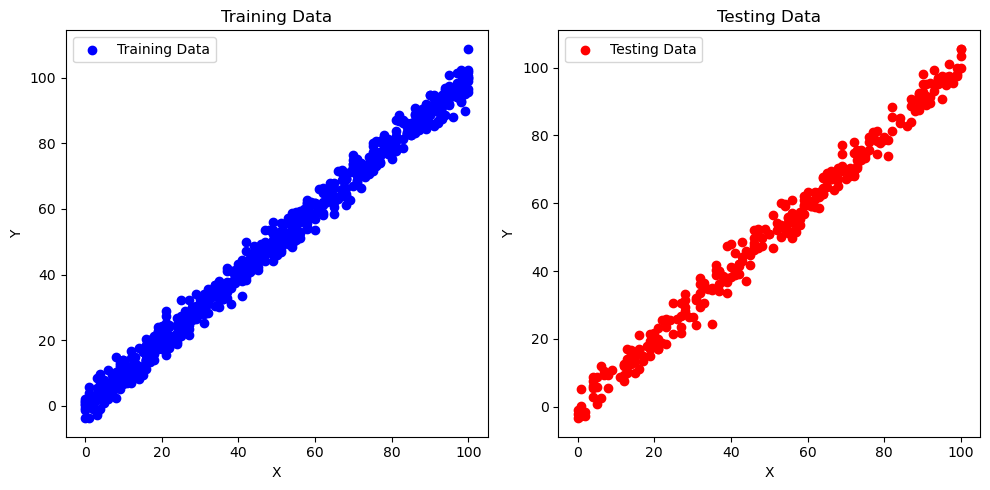

In [16]:
# 초기 데이터 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_data['x'], train_data['y'], color='blue', label='Training Data')
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_data['x'], test_data['y'], color='red', label='Testing Data')
plt.title('Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

### Model Construction

In [17]:
# 데이터셋을 특성과 타겟으로 분리
X_train_full = train_data['x'].values.reshape(-1,1)
y_train_full = train_data['y'].values
X_test = test_data['x'].values.reshape(-1,1)
y_test = test_data['y'].values

### Train Model & Select Model

In [18]:
# 훈련 데이터셋을 훈련용과 검증용으로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# 검증 데이터에 대한 예측 및 성능 평가
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {mse_val}')
print(f'Validation R^2 Score: {r2_val}')

Validation Mean Squared Error: 9.299074911884496
Validation R^2 Score: 0.9887032554723143


---

## Performance

In [20]:
# 테스트 데이터에 대한 예측 및 성능 평가
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'\nTest Mean Squared Error: {mse_test}')
print(f'Test R^2 Score: {r2_test}')


Test Mean Squared Error: 9.660918226809208
Test R^2 Score: 0.9885307726077903


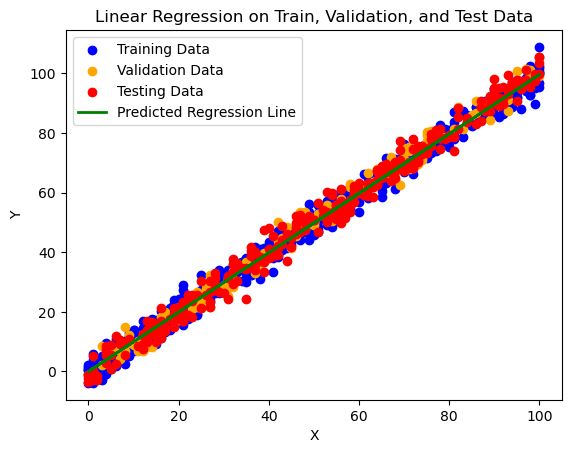

In [21]:
# 학습 데이터 및 검증 데이터 시각화
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_val, y_val, color='orange', label='Validation Data')
# 테스트 데이터와 예측 결과 시각화
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_test_pred, color='green', linewidth=2, label='Predicted Regression Line')

plt.title('Linear Regression on Train, Validation, and Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
